In [27]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
mall_dataset = pd.read_csv('..\\..\\Datasets\\MallCustomers.csv')
print(mall_dataset.shape, '\n')
mall_dataset.head()

(200, 5) 



,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Printing the info of the dataset
mall_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
# Printing the basic statistics of the dataset
mall_dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
# Checking for the missing values 
print('Missing values in the dataset:', mall_dataset.isnull().sum().sum())

Missing values in the dataset: 0


-> Since there is no missing values in the dataset, we can proceed to implementing the clustering algorithms.

<hr>

## <b>Exercise 01: Implementing K-Means Clustering on Customer Segments</b>
#### <b>Task:</b> Apply K-Means clustering to the Mall Customers dataset to segment customers based on their annual income and spending score. Visualize the resulting clusters.

In [7]:
# Select relevant features
X = mall_dataset[['Annual Income (k$)', 'Spending Score (1-100)']]

In [8]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original dataset
mall_dataset['Cluster'] = clusters

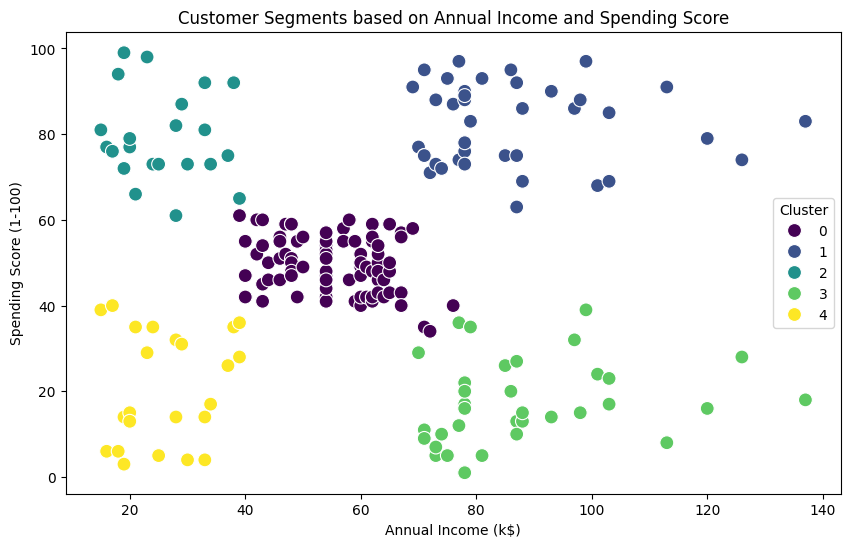

In [13]:
# Visualize the resulting clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mall_dataset, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Segments based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

-> The scatter plot visually represents the customer segments based on their annual income and spending score, with different colors indicating distinct clusters formed by the K-Means algorithm. Each cluster highlights a unique group of customers with similar spending behaviors and income levels. For instance, one cluster may consist of high-income customers who exhibit varying spending scores, while another may represent low-income customers with high spending scores.

<hr>

## <b>Exercise 02: Optimal Number of Clusters: Elbow Method and Silhouette Score</b>
#### <b>Task:</b> Use the Elbow Method and Silhouette Score to find the optimal number of clusters for the Mall Customers dataset. Discuss the criteria for selecting the number of clusters.

In [15]:
# Elbow Method: Calculate WCSS for different numbers of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

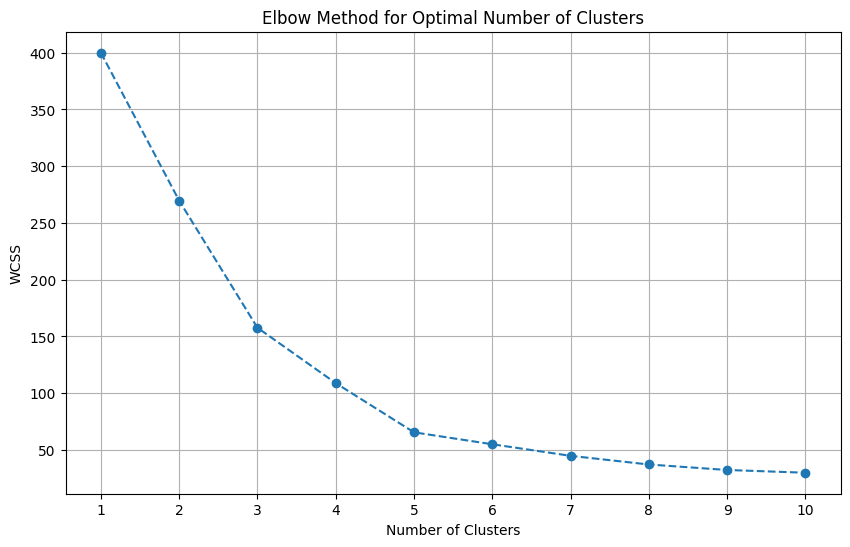

In [16]:
# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 11, 1))
plt.grid()
plt.show()

-> The <b>Elbow Method</b> graph displays the Within-Cluster Sum of Squares (WCSS) against the number of clusters. As the number of clusters increases, WCSS decreases; however, the rate of decrease slows down after a certain point, forming an "elbow." This point suggests the optimal number of clusters, typically where adding more clusters yields diminishing returns in terms of variance explained.

In [17]:
# Silhouette Scores for different numbers of clusters
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

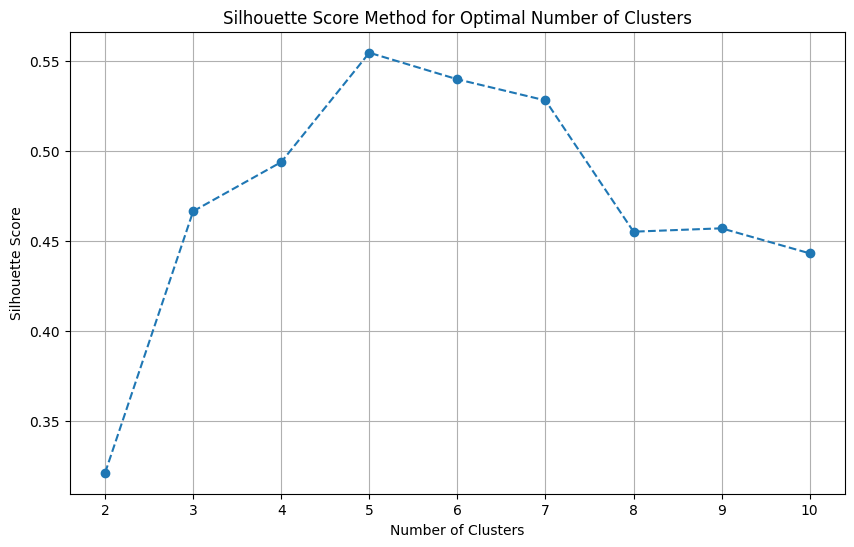

In [18]:
# Plotting the Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(np.arange(2, 11, 1))
plt.grid()
plt.show()

-> The <b>Silhouette Score</b> graph plots the silhouette scores for different numbers of clusters. Higher scores indicate better-defined clusters, with values closer to 1 suggesting that samples are well-clustered. An optimal number of clusters can be identified where the silhouette score reaches its peak, indicating the best separation between clusters. Together, these graphs help assess the clustering quality and determine an appropriate number of clusters for the dataset.

<h2><b>Discussion of Criteria for Selecting the Number of Clusters</h2></b>
<p><b>1) Elbow Method:</b> The Elbow Method involves plotting the Within-Cluster Sum of Squares (WCSS) against the number of clusters. The point at which the WCSS starts to decrease at a slower rate (forming an "elbow") indicates an appropriate number of clusters. For example, if the plot shows a noticeable bend around 5 clusters, that could suggest that 5 is the optimal number.
<br><br>
<b> 2) Silhouette Score:</b> The Silhouette Score measures how similar an object is to its own cluster compared to other clusters. A higher score indicates better-defined clusters. If the plot of silhouette scores peaks at a specific number of clusters, that number can be considered optimal. Ideally, the silhouette score should be above 0.5 for good clustering.</p>

<hr>

## <b>Exercise 03: Cluster Profiling and Insights</b>
#### <b>Task:</b> Analyze the characteristics of the clusters formed in the Mall Customers dataset. Provide insights into the customer segments based on their spending behavior and income levels.

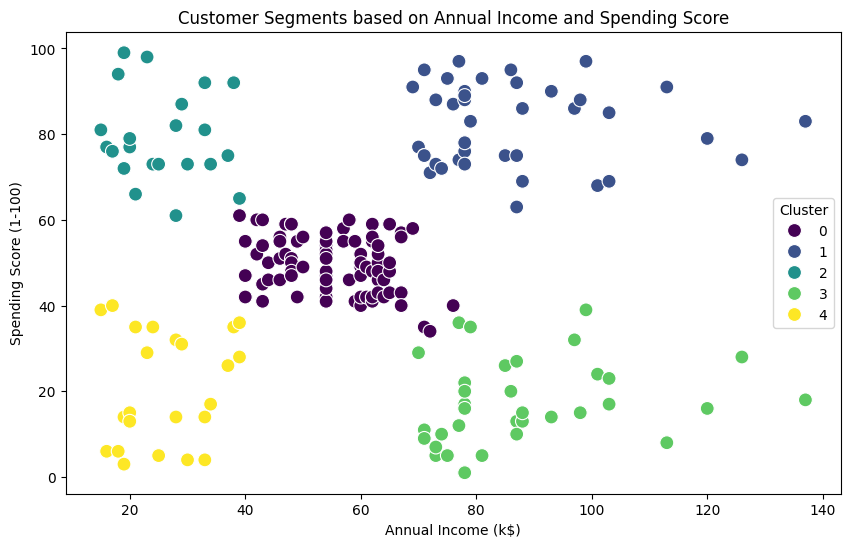

In [19]:
# Visualize the resulting clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mall_dataset, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Segments based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

<h2><b>Cluster Profiling and Insights</b></h2>
<p>After applying K-Means clustering to the Mall Customers dataset, we can analyze the characteristics of the resulting clusters to derive insights into different customer segments based on their annual income and spending scores.</p>

<h4><b>1) Cluster Composition:</b></h4>
<p>Each cluster represents a distinct group of customers, differentiated by their income levels and spending behavior.
By examining the mean values of annual income and spending scores for each cluster, we can identify patterns that characterize each segment.</p>

<h4><b>2) High Income, Low Spending:</b></h4>
<p>One cluster may consist of customers with high annual incomes but low spending scores. This group could represent affluent individuals who are conservative in their spending habits, potentially valuing quality over quantity.</p>

<h4><b>3) Moderate Income, High Spending:</b></h4>
<p>Another cluster may include customers with moderate income levels who exhibit high spending scores. This segment may consist of consumers who prioritize leisure and luxury, indicating a willingness to spend on non-essential items.</p>

<h4><b>4) Budget-Conscious Shoppers:</b></h4>
<p>A cluster might be formed by customers with low annual incomes and low spending scores. This group likely includes budget-conscious shoppers who are cautious with their expenses, possibly indicating price sensitivity.</p>

<h4><b>5) Affluent Spenders:</b></h4>
<p>Conversely, a cluster of customers with high income and high spending scores would represent affluent spenders who indulge in luxury items and experiences. This group could be targeted for high-end products and services.</p>

<hr>

## <b>Exercise 04: Hierarchical Clustering for Customer Segmentation</b>
#### <b>Task:</b> Implement hierarchical clustering on the Mall Customers dataset. Compare the clusters formed with those obtained from K-Means and discuss the differences.

In [21]:
# Select relevant features
X = mall_dataset[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
# Hierarchical clustering
Z = linkage(X_scaled, method='ward')

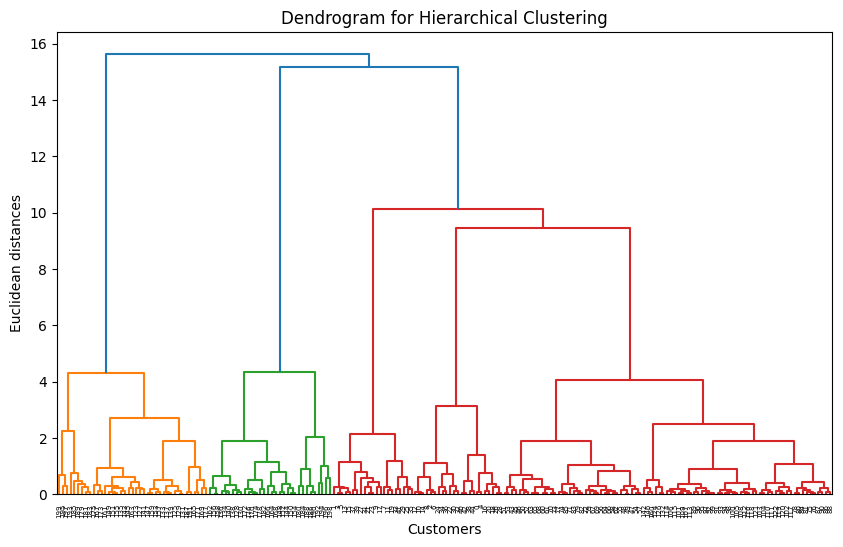

In [23]:
# Plotting the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [24]:
# Forming clusters using a threshold
threshold = 5  # You may choose a threshold based on the dendrogram
hierarchical_clusters = fcluster(Z, threshold, criterion='distance')

In [25]:
# Adding cluster labels to the dataset
mall_dataset['Hierarchical_Cluster'] = hierarchical_clusters

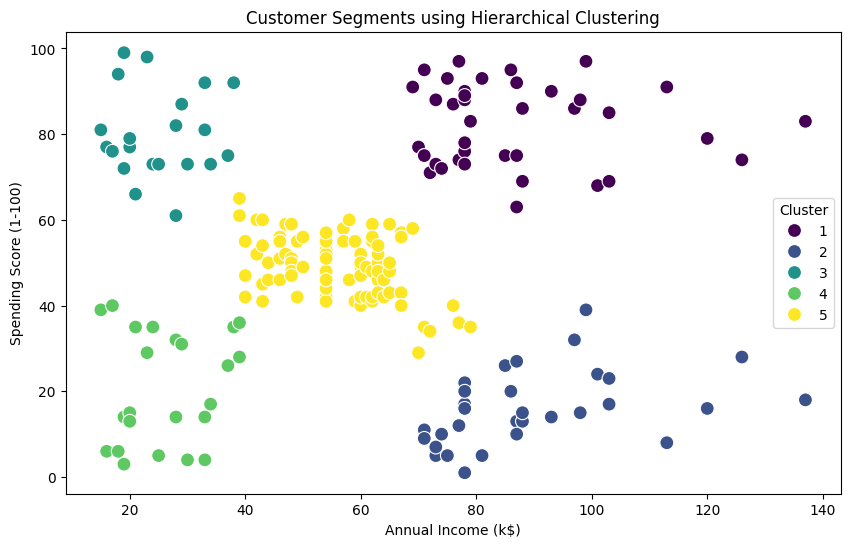

In [26]:
# Visualize the resulting clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mall_dataset, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Hierarchical_Cluster', palette='viridis', s=100)
plt.title('Customer Segments using Hierarchical Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

<h2><b>Comparison with K-Means Clustering</b></h2>

<h4><b>1) Cluster Formation:</b></h4>
<p>K-Means and hierarchical clustering may result in different cluster shapes and sizes. K-Means is sensitive to the initial placement of centroids, which can lead to variations in results. Hierarchical clustering, particularly when using methods like Ward’s linkage, builds a hierarchy that can better capture the nested structure of data.</p>

<h4><b>2) Cluster Count:</b></h4>
<p>K-Means requires you to specify the number of clusters in advance, whereas hierarchical clustering allows for a more flexible exploration of cluster counts based on the dendrogram. The optimal number of clusters in hierarchical clustering can be visually assessed.</p>

<h4><b>3) Sensitivity to Outliers:</b></h4>
<p>Hierarchical clustering can be more robust to outliers due to its linkage approach, which aggregates data points based on their distances. In contrast, K-Means can be skewed by outliers as they can significantly affect the position of the centroids.</p>

<h4><b>4) Interpretability:</b></h4>
<p>Dendrograms provide a visual interpretation of how clusters are formed, showing the relationships between individual data points and the distances at which clusters merge. This interpretability can be beneficial for understanding customer segments more deeply.</p>

<h4><b>5) Practical Implications:</b></h4>
<p>In practice, businesses might choose K-Means for its efficiency and speed when dealing with large datasets. However, hierarchical clustering could be preferred when interpretability and a detailed understanding of customer segments are crucial.</p>


<hr>

## <b>Exercise 05: Visualizing Clusters with PCA</b>
#### <b>Task:</b> Apply PCA to the Mall Customers dataset to reduce its dimensionality. Visualize the clusters from both K-Means and hierarchical clustering in the PCA-reduced space.

In [28]:
# Applying K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
mall_dataset['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

In [29]:
# Applying Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=5)
mall_dataset['Hierarchical_Cluster'] = hierarchical.fit_predict(X_scaled)

In [30]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [31]:
# Adding PCA results to the dataset
mall_dataset['PCA1'] = X_pca[:, 0]
mall_dataset['PCA2'] = X_pca[:, 1]

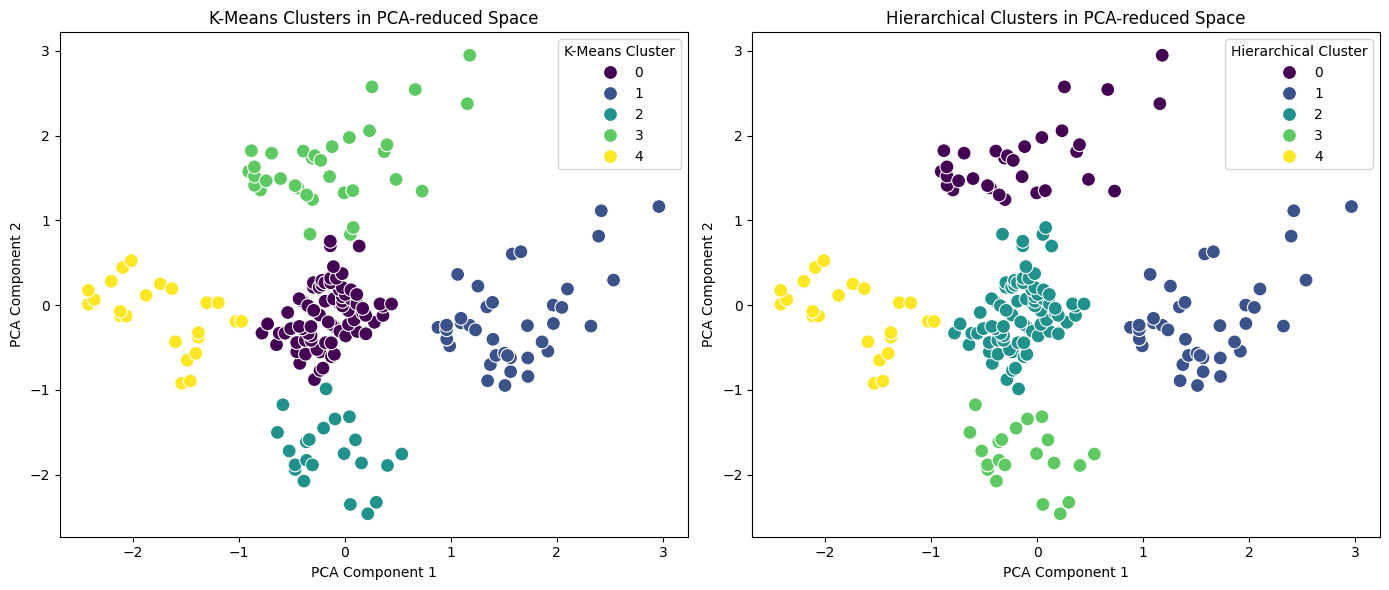

In [34]:
# Visualizing K-Means Clusters
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=mall_dataset, x='PCA1', y='PCA2', hue='KMeans_Cluster', palette='viridis', s=100)
plt.title('K-Means Clusters in PCA-reduced Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='K-Means Cluster')

# Visualizing Hierarchical Clusters
plt.subplot(1, 2, 2)
sns.scatterplot(data=mall_dataset, x='PCA1', y='PCA2', hue='Hierarchical_Cluster', palette='viridis', s=100)
plt.title('Hierarchical Clusters in PCA-reduced Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Hierarchical Cluster')

plt.tight_layout()
plt.show()

-> In the <b>K-Means plot</b>, clusters appear more spherical and evenly distributed, reflecting its centroid-based nature, while the <b>hierarchical clustering plot</b> displays more irregularly shaped clusters, suggesting a more flexible grouping that captures data hierarchy. Both methods yield similar numbers of clusters, but the hierarchical approach demonstrates better handling of varied cluster densities. Overall, K-Means is efficient for larger datasets, whereas hierarchical clustering offers deeper insights into relationships between customer segments.

<hr>